# CH2. 실전 프로그램 개발 - Bookmark앱

: 자주 방문하는 사이트를 등록해 두었다가 나중에 그 사이트에 재방문할 때 쉽게 찾아갈 수 있게 해주는 앱




## 1. 애플리케이션 설계

- 화면 UI 설계   

- 테이블 설계   
> TABLE - BOOKMARK   
> id : Integer / PK, AutoIncrement   
> title : CharField(100) / Blank   
> url : URLField / Unique   

- 로직 설계   
> /bookmark/ -> BookmarkLV.as_view() -> bookmark_list.html   
> /bookmark/pk/ -> BookmarkDV.as_view() -> bookmark_detail.html   

- URL 설계   
> /bookmark/ : BookmarkLV(ListView), bookmark_list.html   
> /bookmark/pk/* : BookmarkDV(DetailView), bookmark_detail.html   
> /admin/ : 장고 기본 제공

- 코딩 순서   
> startproject : mysite 프로젝트 생성   
> settings.py : 프로젝트 설정 항목 변경   
> migrate : User/Group 테이블 생성   
> createsuperUser : 프로젝트 관리자 생성   
> startapp : 북마크 앱 생성   
> settings.py : 북마크 앱 등록   
> models.py : 모델 정의
> migration : 테이블 등록   
> urls.py : URL 정의   
> templatese : 템플릿 파일 작성

## 2. 개발 코딩하기 - 뼈대

1. 프로젝트 생성   
```
django-admin startproject mysite
```
*상위 mysite 파일 이름 변경 (ch99)*

2. settings.py 변경

```
# 호스트 지정
ALLOWED_HOSTS = ['192.168.56.101'. 'localhost', '127.0.0.1']   

# 앱 등록

# 템플릿 디렉토리 지정
TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': [os.path.join(BASE_DIR, 'templates')],
        'APP_DIRS': True,
        'OPTIONS': {
            'context_processors': [
                'django.template.context_processors.debug',
                'django.template.context_processors.request',
                'django.contrib.auth.context_processors.auth',
                'django.contrib.messages.context_processors.messages',
            ],
        },
    },
]

# 데이터베이스 지정

# 타임존 지정
TIME_ZONE = 'Asia/Seoul'

# 정적 파일 지정
STATIC_URL = 'static/'
STATICFILES_DIRS = [os.path.join(BASE_DIR, 'static')]

# 미디어 관련 사항 지정
MEDIA_URL = '/media/'
MEDIA_ROOT = os.path.join(BASE_DIR, 'media')
```

3. 애플리케이션 생성
```
python manage.py startapp bookmark
```

## 3. 개발 코딩하기 - 모델

1. 테이블 생성

```
bookmark/models.py

from django.db import models

class Bookmark(models.Models) :
    # PK 자동 생성
    # 빈 칸 허용
    title = models.CharField('TITLE', max_length = 100, blank = True)
    url = models.UrlField('URL', unique = True)

    def __str__(self):
        return self.title
```

2. Admin에 반영

```
from django.contrib import admin

# admin.site.register(Bookmark, BookmarkAdmin)

@admin.register(Bookmark)
class BookmarkAmdin(admin.ModelAmdin) :
    list_display = ('id', 'title', 'url')

```

3. 데이터베이스 변경사항 반영

```
python manage.py makemigrations
python manage.py migrate
```

## 4. 개발 코딩하기 - URL

1. URLconf 작성   
: 주석처리 된 것은 views.py를 만들지 않고 오로지 ulrs.py로 해결할 수 있는 문장

```
from django.contrib import admin
from django.urls import path
from bookmark.views import BookmarkLV, BookmarkDV
#from django.views.generic import ListView, DetailView
#from bookmark.models import Bookmark

urlpatterns = [
    path('admin/', admin.site.urls),
    path('bookmark/', BoomarkLV.as_view(), name = 'index'),
    path('bookmark/<int:pk>', BookmarkDV.as_view(), name = 'detail'),
    #path('bookmark/', ListView.as_view(model = Bookmark), name = 'index'),
    #path('bookmark/<int:pk>', DetailView.as_view(model = Bookmark), name = 'detail'),
]
```

## 5. 개발 코딩하기 - 뷰

1. views.py 작성

```
from django.views.generic import ListView, DetailView
from bookmark.models import Bookmark

class BookmarkLV(ListView) :
    model = Bookmark
    # 컨텍스트 변수 (objecct_list) 사용 가능
    # 템플릿 파일명 (소문자_list.html) 지정 가능
    
    
class BookmarkDV(DetailView) :
    model = Bookmark
    # 특정 객체를 컨텍스트 변수로 지정 가능
```

## 6. 개발 코딩하기 - 템플릿

1. bookmark_list.html 작성

```
<!DOCTYPE html>

<html>

<head>
    <title> Django Bookmark List </title>
</head>

<body>

# 공간을 잡아주는 태그
<div id = "content">

    # 순서가 없는 리스트
    <ul>
        {% for bookmark in object_list %}
            # model에서 return 시킨 title이 출력됨
            # 리스트의 내용 입력
            <li><a href = "{% url 'detail' bookmark.id %}"> {{ bookmark }} </a></li>
        {% endfor %}
    </ul>
</div>

</body>

</html>
```

2. bookmark_detail.html 작성

```
<!DOCTYPE html>

<html>

<head>
    <title> Django Bookmark Detail </title>
</head>

<body>

<div id = "content">

    <h1> {{ object.title }} </h1>

    <ul>
        <li>URL : <a href = "{{ object.url }}">{{ object.url }}</a></li>
    </ul>
</div>

</body>

</html>
```

## 데이터 입력하기

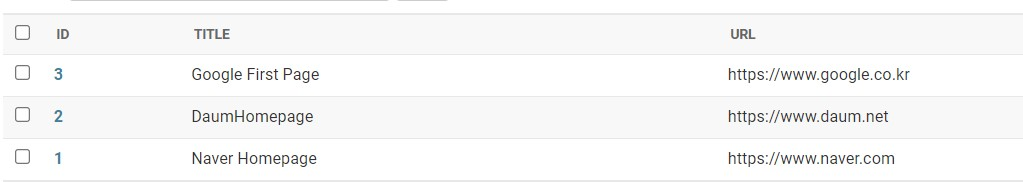

## 페이지 접속하기

http://localhost:8000/bookmark